# The Movies Dataset

* Data source: The movies database, for ~45K movies in movielens data
* Data + kernel on kaggle datasets:  https://www.kaggle.com/rounakbanik/the-movies-dataset
       

This notebook is about my first data science for Movies dataset from Kaggle using Clustering Kmeans algorithm.

# Data Description
The content of the data is as following:
* movies_metadata.csv: The main Movies Metadata file. Contains information on 45,000 movies featured in the Full MovieLens dataset. Features include posters, backdrops, budget, revenue, release dates, languages, production countries and companies.

* keywords.csv: Contains the movie plot keywords for our MovieLens movies. Available in the form of a stringified JSON Object.

* credits.csv: Consists of Cast and Crew Information for all our movies. Available in the form of a stringified JSON Object.

* links.csv: The file that contains the TMDB and IMDB IDs of all the movies featured in the Full MovieLens dataset.


The Movie Links and Ratings have been obtained from the Official GroupLens website. The files are a part of the dataset available here: https://grouplens.org/datasets/movielens/latest/

In [162]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #import visualization tools
import seaborn as sns  # import seaborn visualization tool
import pylab as pl
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
%matplotlib inline

In [163]:
df_credits = pd.read_csv(r"C:\Users\mosta\Desktop\the-movies-dataset\credits.csv")
print(df_credits)

                                                    cast  \
0      [{'cast_id': 14, 'character': 'Woody (voice)',...   
1      [{'cast_id': 1, 'character': 'Alan Parrish', '...   
2      [{'cast_id': 2, 'character': 'Max Goldman', 'c...   
3      [{'cast_id': 1, 'character': "Savannah 'Vannah...   
4      [{'cast_id': 1, 'character': 'George Banks', '...   
...                                                  ...   
45471  [{'cast_id': 0, 'character': '', 'credit_id': ...   
45472  [{'cast_id': 1002, 'character': 'Sister Angela...   
45473  [{'cast_id': 6, 'character': 'Emily Shaw', 'cr...   
45474  [{'cast_id': 2, 'character': '', 'credit_id': ...   
45475                                                 []   

                                                    crew      id  
0      [{'credit_id': '52fe4284c3a36847f8024f49', 'de...     862  
1      [{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...    8844  
2      [{'credit_id': '52fe466a9251416c75077a89', 'de...   15602  
3      [{'c

In [164]:
df_credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [165]:
df = pd.read_csv(r'C:\Users\mosta\Desktop\the-movies-dataset')
df.head()

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\mosta\\Desktop\\the-movies-dataset'

In [ ]:
df[["id","imdb_id"]].dtypes

In [ ]:
df.isnull().sum()

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.dropna(subset=["imdb_id"]).shape

In [ ]:
df.describe()

In [ ]:
df.corr()

In [ ]:
#correlation map
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

In [ ]:
df.drop(df.index[19730],inplace=True)
df.drop(df.index[29502],inplace=True)
df.drop(df.index[35585],inplace=True)

In [ ]:
df_numeric = df[['budget','popularity','revenue','runtime','vote_average','vote_count','title']]

In [166]:
df_numeric.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,title,cluster
0,30000000,21.946943,373554033.0,81.0,7.7,5415.0,Toy Story,1
1,65000000,17.015539,262797249.0,104.0,6.9,2413.0,Jumanji,2
2,0,11.7129,0.0,101.0,6.5,92.0,Grumpier Old Men,3
3,16000000,3.859495,81452156.0,127.0,6.1,34.0,Waiting to Exhale,3
4,0,8.387519,76578911.0,106.0,5.7,173.0,Father of the Bride Part II,3


In [167]:
df_numeric['vote_count'].describe()

count    12177.000000
mean       387.971011
std        890.795312
min         31.000000
25%         50.000000
50%         99.000000
75%        299.000000
max      14075.000000
Name: vote_count, dtype: float64

In [168]:
df_numeric['vote_count'].quantile(np.arange(.74,1,0.01))

0.74     283.00
0.75     299.00
0.76     317.00
0.77     335.00
0.78     356.00
0.79     375.00
0.80     396.00
0.81     425.00
0.82     454.00
0.83     494.16
0.84     533.00
0.85     574.00
0.86     628.00
0.87     685.12
0.88     752.88
0.89     839.64
0.90     924.00
0.91    1020.16
0.92    1147.84
0.93    1316.04
0.94    1517.44
0.95    1729.20
0.96    2082.88
0.97    2549.16
0.98    3291.92
0.99    4729.00
Name: vote_count, dtype: float64

In [169]:
df_numeric = df_numeric[df_numeric['vote_count']>30]

In [170]:
df_numeric.shape

(12177, 8)

# Normalize Data

In [171]:
from sklearn import preprocessing

In [172]:
minmax_processed = preprocessing.MinMaxScaler().fit_transform(df_numeric.drop('title',axis=1))

In [173]:
df_numeric_scaled = pd.DataFrame(minmax_processed, index=df_numeric.index, columns=df_numeric.columns[:-1])

In [174]:
df_numeric_scaled.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,title
0,0.078947,0.040082,0.133988,0.092360,0.810526,0.383367,0.25
1,0.171053,0.031075,0.094261,0.118586,0.726316,0.169610,0.50
2,0.000000,0.021389,0.000000,0.115165,0.684211,0.004343,0.75
3,0.042105,0.007045,0.029216,0.144812,0.642105,0.000214,0.75
4,0.000000,0.015315,0.027468,0.120867,0.600000,0.010111,0.75


# Apply K-Means Clustering

In [175]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]

In [176]:
score = [kmeans[i].fit(df_numeric_scaled).score(df_numeric_scaled) for i in range(len(kmeans))]

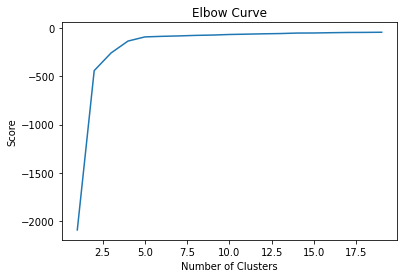

In [177]:
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

### Fit K-Means clustering for k=5

In [178]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_numeric_scaled)

KMeans(n_clusters=5)

In [179]:
len(kmeans.labels_)

12177

In [180]:
df_numeric['cluster'] = kmeans.labels_

In [181]:
df_numeric.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,title,cluster
0,30000000,21.946943,373554033.0,81.0,7.7,5415.0,Toy Story,3
1,65000000,17.015539,262797249.0,104.0,6.9,2413.0,Jumanji,4
2,0,11.7129,0.0,101.0,6.5,92.0,Grumpier Old Men,0
3,16000000,3.859495,81452156.0,127.0,6.1,34.0,Waiting to Exhale,0
4,0,8.387519,76578911.0,106.0,5.7,173.0,Father of the Bride Part II,0


In [182]:
df_numeric.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,title,cluster
0,30000000,21.946943,373554033.0,81.0,7.7,5415.0,Toy Story,3
1,65000000,17.015539,262797249.0,104.0,6.9,2413.0,Jumanji,4
2,0,11.7129,0.0,101.0,6.5,92.0,Grumpier Old Men,0
3,16000000,3.859495,81452156.0,127.0,6.1,34.0,Waiting to Exhale,0
4,0,8.387519,76578911.0,106.0,5.7,173.0,Father of the Bride Part II,0


In [183]:
df_numeric.dropna(inplace=True)

In [184]:
df_numeric['vote_count'].describe()

count    12177.000000
mean       387.971011
std        890.795312
min         31.000000
25%         50.000000
50%         99.000000
75%        299.000000
max      14075.000000
Name: vote_count, dtype: float64

In [185]:
df_numeric['vote_count'].quantile(np.arange(.74,1,0.01))

0.74     283.00
0.75     299.00
0.76     317.00
0.77     335.00
0.78     356.00
0.79     375.00
0.80     396.00
0.81     425.00
0.82     454.00
0.83     494.16
0.84     533.00
0.85     574.00
0.86     628.00
0.87     685.12
0.88     752.88
0.89     839.64
0.90     924.00
0.91    1020.16
0.92    1147.84
0.93    1316.04
0.94    1517.44
0.95    1729.20
0.96    2082.88
0.97    2549.16
0.98    3291.92
0.99    4729.00
Name: vote_count, dtype: float64

In [186]:
df_numeric = df_numeric[df_numeric['vote_count']>30]

In [187]:
df_numeric.shape

(12177, 8)

## Normalize data

In [188]:
from sklearn import preprocessing

In [189]:
minmax_processed = preprocessing.MinMaxScaler().fit_transform(df_numeric.drop('title',axis=1))

In [190]:
df_numeric_scaled = pd.DataFrame(minmax_processed, index=df_numeric.index, columns=df_numeric.columns[:-1])

In [191]:
df_numeric_scaled.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,title
0,0.078947,0.040082,0.133988,0.092360,0.810526,0.383367,0.75
1,0.171053,0.031075,0.094261,0.118586,0.726316,0.169610,1.00
2,0.000000,0.021389,0.000000,0.115165,0.684211,0.004343,0.00
3,0.042105,0.007045,0.029216,0.144812,0.642105,0.000214,0.00
4,0.000000,0.015315,0.027468,0.120867,0.600000,0.010111,0.00


# Apply K-Means Clustering

In [192]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]

In [193]:
score = [kmeans[i].fit(df_numeric_scaled).score(df_numeric_scaled) for i in range(len(kmeans))]

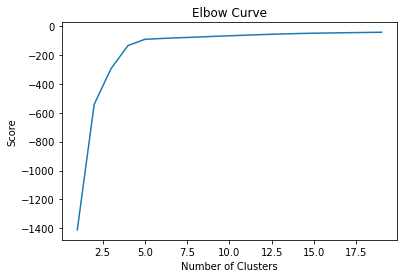

In [194]:
pl.plot(Nc,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [195]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_numeric_scaled)

KMeans(n_clusters=5)

In [196]:
len(kmeans.labels_)

12177

In [197]:
df_numeric['cluster'] = kmeans.labels_

In [198]:
df_numeric.head()

,budget,popularity,revenue,runtime,vote_average,vote_count,title,cluster
0,30000000,21.946943,373554033.0,81.0,7.7,5415.0,Toy Story,4
1,65000000,17.015539,262797249.0,104.0,6.9,2413.0,Jumanji,2
2,0,11.7129,0.0,101.0,6.5,92.0,Grumpier Old Men,0
3,16000000,3.859495,81452156.0,127.0,6.1,34.0,Waiting to Exhale,0
4,0,8.387519,76578911.0,106.0,5.7,173.0,Father of the Bride Part II,0


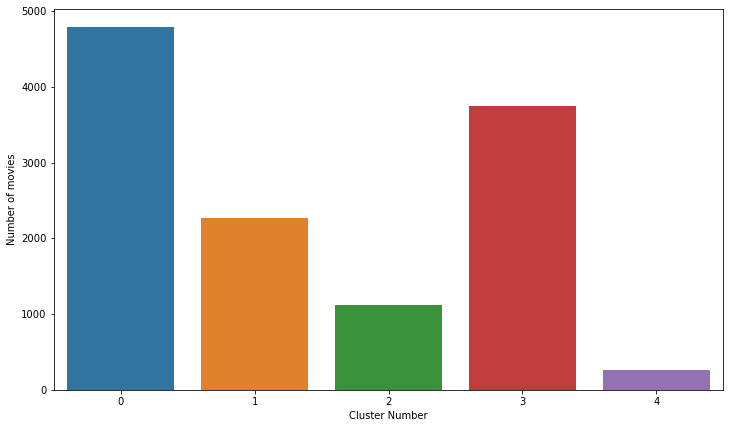

In [199]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,5,1),y=df_numeric.groupby(['cluster']).count()['budget'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Number of movies")

In [200]:
df_numeric.groupby(['cluster']).mean()

,revenue,runtime,vote_average,vote_count
cluster,,,,
0,1.443148e+07,100.397492,6.189028,169.585371
1,1.028055e+07,93.718130,4.940979,122.632554
2,1.614962e+08,114.282783,6.207939,1122.674398
3,1.692182e+07,109.899038,7.278713,305.669338
4,6.288649e+08,126.146154,6.903846,4738.096154


In [201]:
size_array = list(df_numeric.groupby(['cluster']).count()['budget'].values)

In [202]:
size_array

[4785, 2267, 1121, 3744, 260]

In [203]:
df_numeric[df_numeric['cluster']==size_array.index(sorted(size_array)[0])].sample(5)

,budget,popularity,revenue,runtime,vote_average,vote_count,title,cluster
21175,255000000,12.729104,8.928991e+07,149.0,5.9,2361.0,The Lone Ranger,4
26567,250000000,145.882135,1.153304e+09,147.0,7.1,7462.0,Captain America: Civil War,4
12217,150000000,11.379355,5.853490e+08,101.0,6.9,4977.0,I Am Legend,4
13893,250000000,19.083723,9.339592e+08,153.0,7.4,5435.0,Harry Potter and the Half-Blood Prince,4
19139,95000000,13.26958,8.772448e+08,88.0,6.2,2731.0,Ice Age: Continental Drift,4


In [204]:
df_numeric[df_numeric['cluster']==size_array.index(sorted(size_array)[1])].sample(5)

,budget,popularity,revenue,runtime,vote_average,vote_count,title,cluster
4260,45000000,10.869056,141220678.0,83.0,5.4,1019.0,Scary Movie 2,2
3898,60000000,6.287072,0.0,125.0,6.5,530.0,The Family Man,2
23737,40000000,27.470696,126069509.0,97.0,5.2,1733.0,Sex Tape,2
14165,40000000,8.805723,186167139.0,82.0,5.4,851.0,The Final Destination,2
17508,35000000,10.009007,150483765.0,109.0,6.5,2306.0,Friends with Benefits,2


In [205]:
df_numeric[df_numeric['cluster']==size_array.index(sorted(size_array)[-1])].sample(5)

,budget,popularity,revenue,runtime,vote_average,vote_count,title,cluster
18721,10000000,4.883085,610986.0,101.0,5.9,103.0,The Ledge,0
7724,0,2.379551,0.0,113.0,6.4,45.0,Time of the Wolf,0
7193,25000000,13.083718,30411183.0,108.0,6.3,844.0,The Girl Next Door,0
44310,0,4.743842,0.0,92.0,6.6,155.0,La Tour Montparnasse Infernale,0
1991,8000000,8.441602,69821334.0,111.0,6.1,328.0,Splash,0
